In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pasta raiz para as imagens
RAIZ = "/content/drive/MyDrive/IFCE/Mestrado em Ciência da Computação/Processamento Digital de Imagem/Trabalhos/"

#Pasta das imagens
IMG_BINA = RAIZ + "Imagens Binarias/"
IMG_GRAY = RAIZ + "Imagens Tom Cinza/"

# Bibliotecas

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Funções Gerais

In [ ]:
def carregar_imagem(img, grayscale):

  if grayscale:

    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

  else:

    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  return img

# Questão 18

Aplique filtros passa-baixa no domínio da frequência, utilizando os filtros
Gaussiano, Butterworth e Ideal. Apresente imagem original, espectro da imagem, filtro aplicado, espectro do resultado e imagem final no domínio espacial.

In [ ]:
def calcula_fft2_shift(img):

  F = np.fft.fft2(img)
  F_shift = np.fft.fftshift(F)

  return F_shift

In [ ]:
def calcula_espectro_log(F_shift):

  mag = np.abs(F_shift)
  esp = np.log(1 + mag)

  return esp

In [ ]:
def cria_grade_distancia(shape):

  h, w = shape

  cy, cx = h // 2, w // 2
  y, x = np.ogrid[:h, :w]

  D = np.sqrt((y - cy)**2 + (x - cx)**2)

  return D

In [ ]:
def filtro_passa_baixa_ideal(shape, D0):

  D = cria_grade_distancia(shape)

  H = (D <= D0).astype(np.float32)

  return H

In [ ]:
def filtro_passa_baixa_butterworth(shape, D0, n=2):

  D = cria_grade_distancia(shape).astype(np.float32)

  H = 1.0 / (1.0 + (D / (D0 + 1e-8))**(2*n))

  return H.astype(np.float32)

In [ ]:
def filtro_passa_baixa_gaussiano(shape, D0):

  D = cria_grade_distancia(shape).astype(np.float32)

  H = np.exp(-(D**2) / (2 * (D0**2) + 1e-8))

  return H.astype(np.float32)

In [ ]:
def aplica_filtro_frequencia(img, H):

  F_shift = calcula_fft2_shift(img)

  G_shift = F_shift * H

  g = np.fft.ifft2(np.fft.ifftshift(G_shift))
  g = np.real(g)
  g = np.clip(g, 0, 255).astype(np.uint8)

  return F_shift, G_shift, g

In [ ]:
def mostra_resultados_q18(img, H, nome_filtro):

  F_shift = calcula_fft2_shift(img)
  esp_original = calcula_espectro_log(F_shift)

  _, G_shift, img_filtrada = aplica_filtro_frequencia(img, H)
  esp_resultado = calcula_espectro_log(G_shift)

  plt.figure(figsize=(22, 4))

  plt.subplot(1, 5, 1)
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title("Original")
  plt.axis('off')

  plt.subplot(1, 5, 2)
  plt.imshow(esp_original, cmap='gray')
  plt.title("Espectro (log)")
  plt.axis('off')

  plt.subplot(1, 5, 3)
  plt.imshow(H, cmap='gray', vmin=0, vmax=1)
  plt.title(f"Filtro {nome_filtro}")
  plt.axis('off')

  plt.subplot(1, 5, 4)
  plt.imshow(esp_resultado, cmap='gray')
  plt.title("Espectro apos filtro (log)")
  plt.axis('off')

  plt.subplot(1, 5, 5)
  plt.imshow(img_filtrada, cmap='gray', vmin=0, vmax=255)
  plt.title("Resultado espacial")
  plt.axis('off')

  plt.tight_layout()
  plt.show()

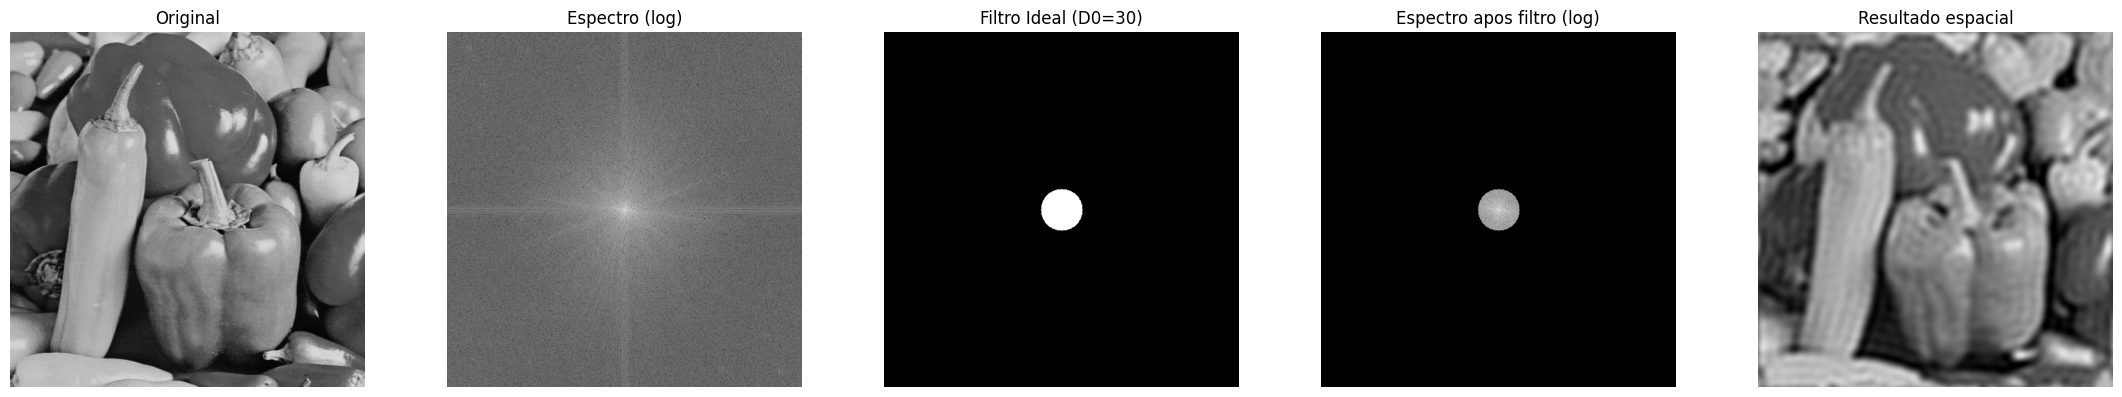

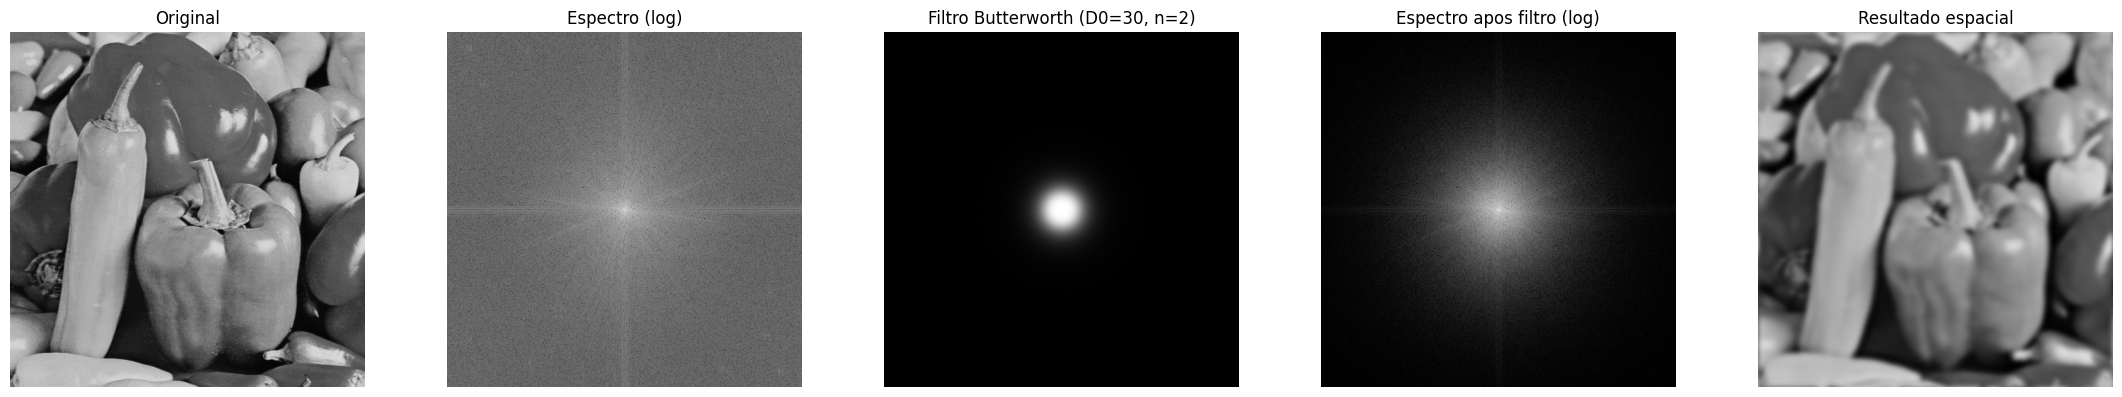

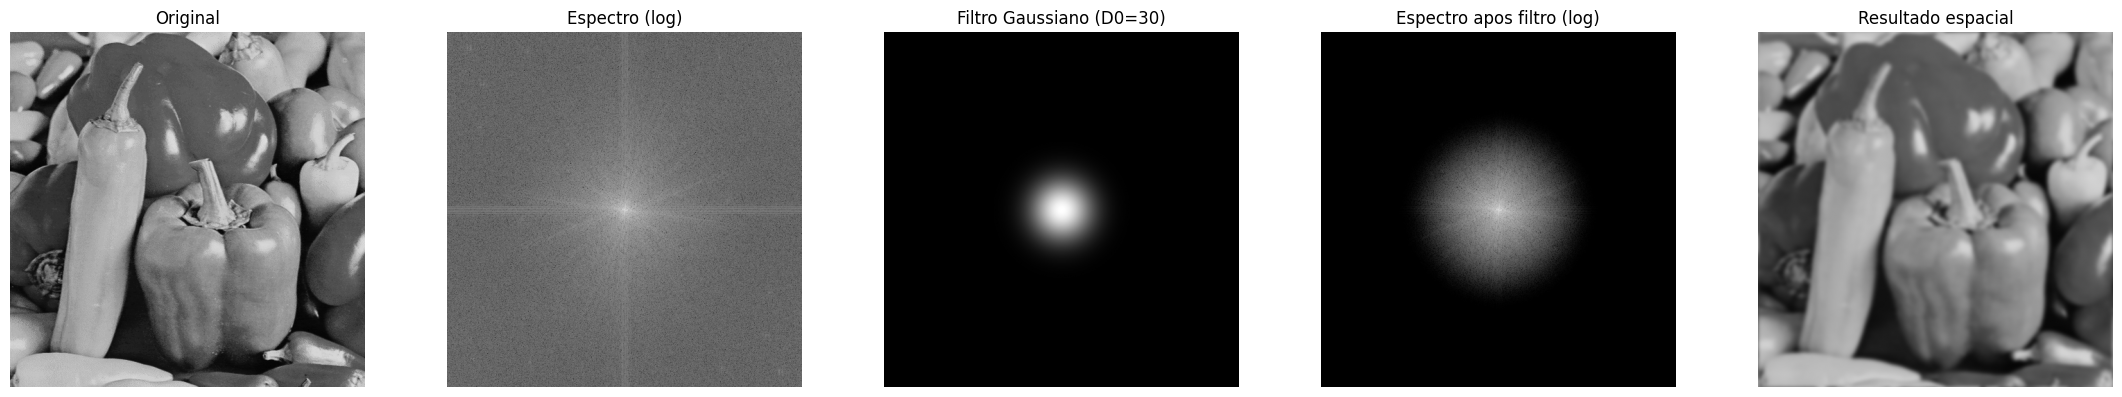

In [ ]:
peppers_q18 = IMG_GRAY + "peppers_gray.tif"

gray = True

img_peppers_q18 = carregar_imagem(peppers_q18, gray)

D0=30
n=2

H_ideal = filtro_passa_baixa_ideal(img_peppers_q18.shape, D0)
H_butt  = filtro_passa_baixa_butterworth(img_peppers_q18.shape, D0, n=n)
H_gauss = filtro_passa_baixa_gaussiano(img_peppers_q18.shape, D0)

img_ideal = mostra_resultados_q18(img_peppers_q18, H_ideal, f"Ideal (D0={D0})")
img_butt  = mostra_resultados_q18(img_peppers_q18, H_butt,  f"Butterworth (D0={D0}, n={n})")
img_gauss = mostra_resultados_q18(img_peppers_q18, H_gauss, f"Gaussiano (D0={D0})")

# Questão 19

Aplique filtros passa-alta no domínio da frequência, utilizando os filtros
Laplaciano, Gaussiano e Butterworth. Compare os resultados com os obtidos com filtros passa-baixa.

In [ ]:
def filtro_passa_alta_laplaciano(shape):

  D = cria_grade_distancia(shape).astype(np.float32)

  H = -4.0 * (np.pi**2) * (D**2)

  H_abs = np.abs(H)

  H_norm = H_abs / (np.max(H_abs) + 1e-8)

  return H_norm.astype(np.float32)

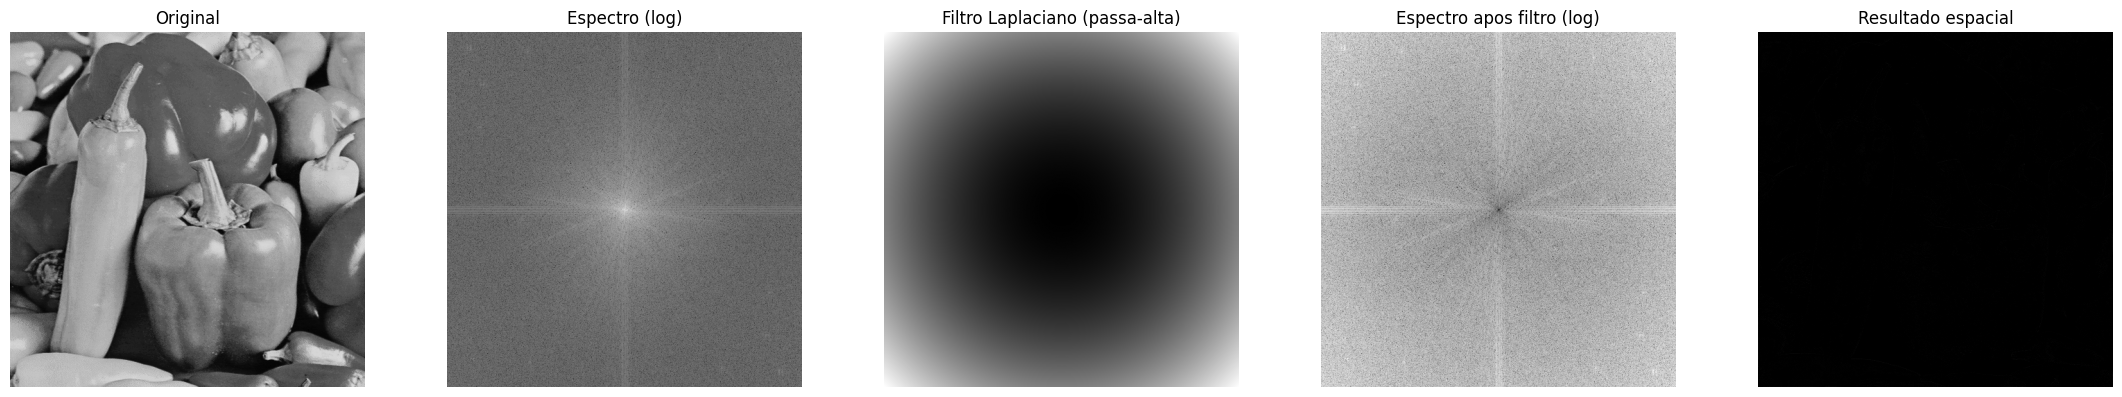

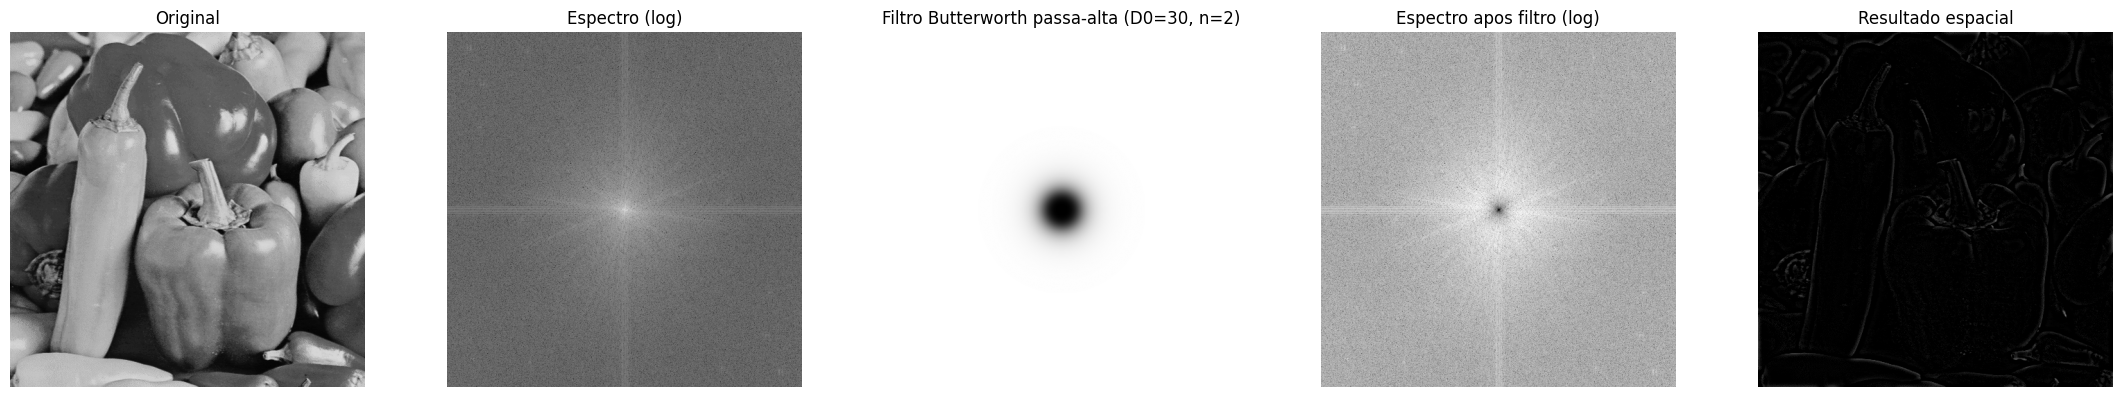

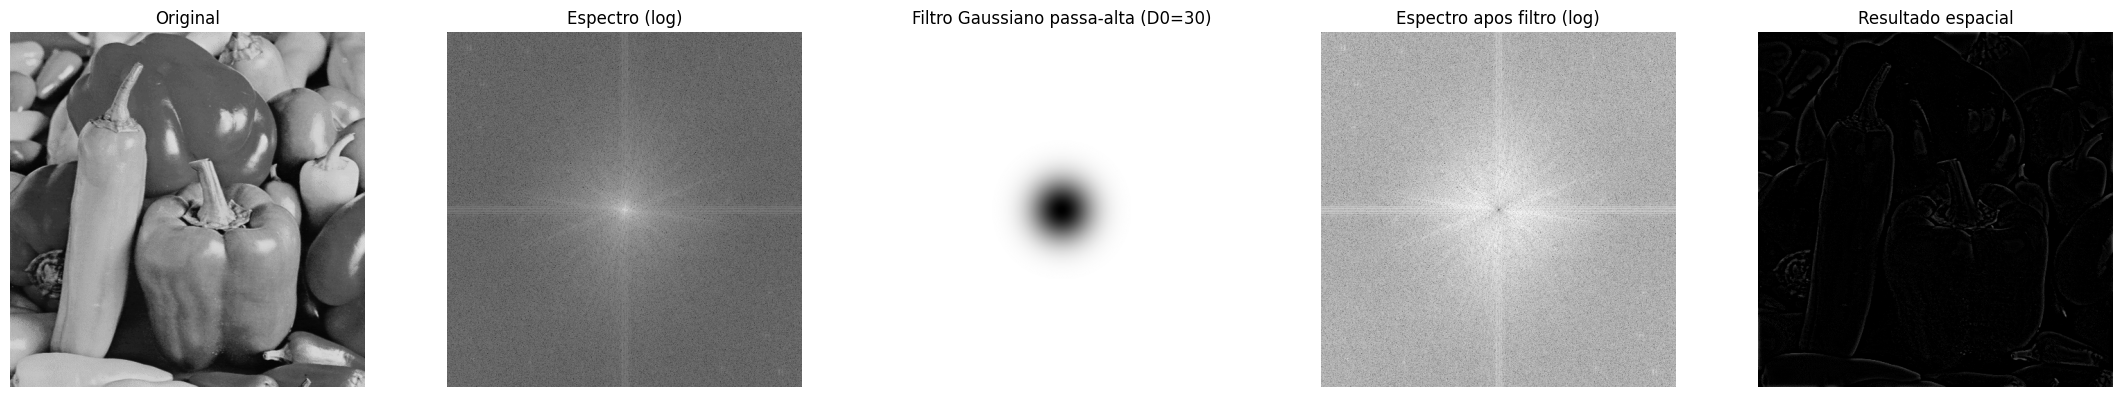

In [ ]:
peppers_q19 = IMG_GRAY + "peppers_gray.tif"

gray = True
img_peppers_q19 = carregar_imagem(peppers_q19, gray)

D0 = 30
n = 2

H_lap = filtro_passa_alta_laplaciano(img_peppers_q19.shape)

H_but = 1.0 - filtro_passa_baixa_butterworth(img_peppers_q19.shape, D0, n)

H_gau = 1.0 - filtro_passa_baixa_gaussiano(img_peppers_q19.shape, D0)

img_lap = mostra_resultados_q18(img_peppers_q19, H_lap, "Laplaciano (passa-alta)")

img_but = mostra_resultados_q18(img_peppers_q19, H_but, f"Butterworth passa-alta (D0={D0}, n={n})")

img_gau = mostra_resultados_q18(img_peppers_q19, H_gau, f"Gaussiano passa-alta (D0={D0})")

# Questão 20

Implemente filtros passa-banda e rejeita-banda no domínio da frequência e
analise seu impacto na preservação e eliminação de regiões espectrais específicas.

In [ ]:
def filtro_passa_banda_ideal(shape, D0, W):

  D = cria_grade_distancia(shape).astype(np.float32)

  D1 = D0 - (W / 2.0)
  D2 = D0 + (W / 2.0)

  H = ((D >= D1) & (D <= D2)).astype(np.float32)

  return H

In [ ]:
def filtro_passa_banda_butterworth(shape, D0, W, n):

  D = cria_grade_distancia(shape).astype(np.float32)

  eps = 1e-8

  H = 1.0 / (1.0 + ((D * W) / (D**2 - D0**2 + eps))**(2 * n))

  return H.astype(np.float32)

In [ ]:
def filtro_passa_banda_gaussiano(shape, D0, W):

  D = cria_grade_distancia(shape).astype(np.float32)

  eps = 1e-8

  H = np.exp(-((D**2 - D0**2)**2) / ((D * W + eps)**2))

  return H.astype(np.float32)

In [ ]:
def filtro_rejeita_banda_ideal(shape, D0, W):

  return 1.0 - filtro_passa_banda_ideal(shape, D0, W)

def filtro_rejeita_banda_butterworth(shape, D0, W, n):

  return 1.0 - filtro_passa_banda_butterworth(shape, D0, W, n)

def filtro_rejeita_banda_gaussiano(shape, D0, W):

  return 1.0 - filtro_passa_banda_gaussiano(shape, D0, W)

/tmp/ipython-input-1093157205.py:7: RuntimeWarning: overflow encountered in power
  H = 1.0 / (1.0 + ((D * W) / (D**2 - D0**2 + eps))**(2 * n))


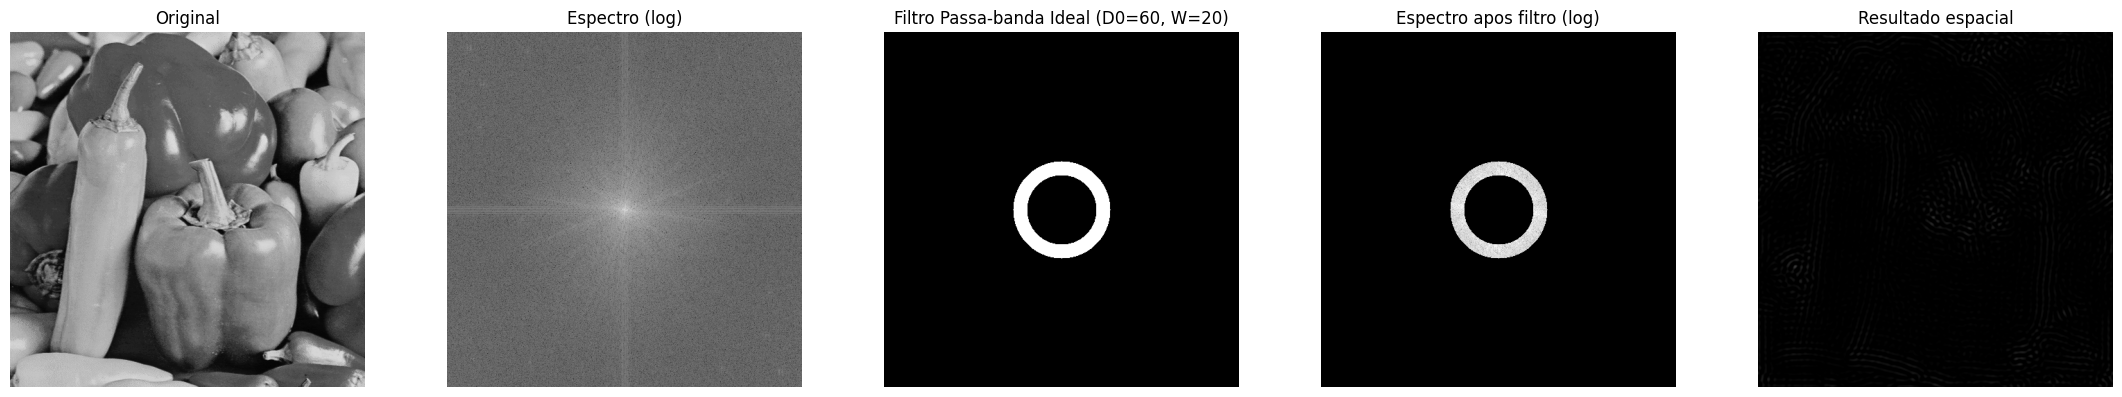

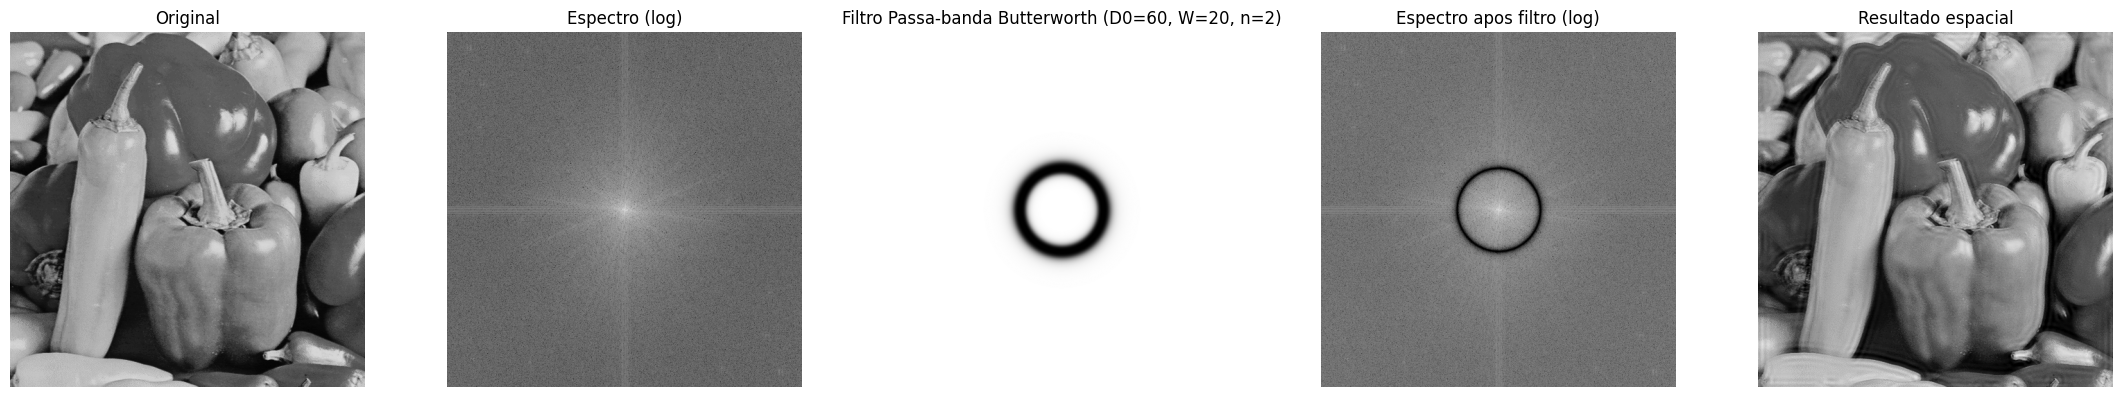

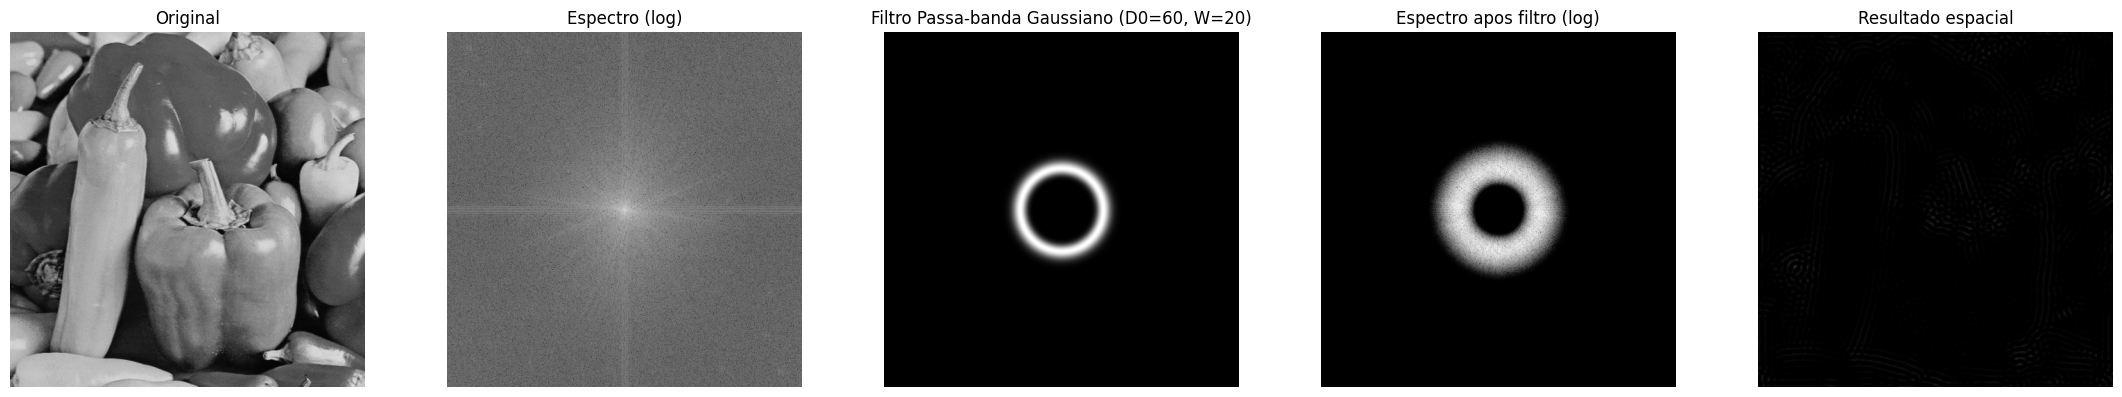

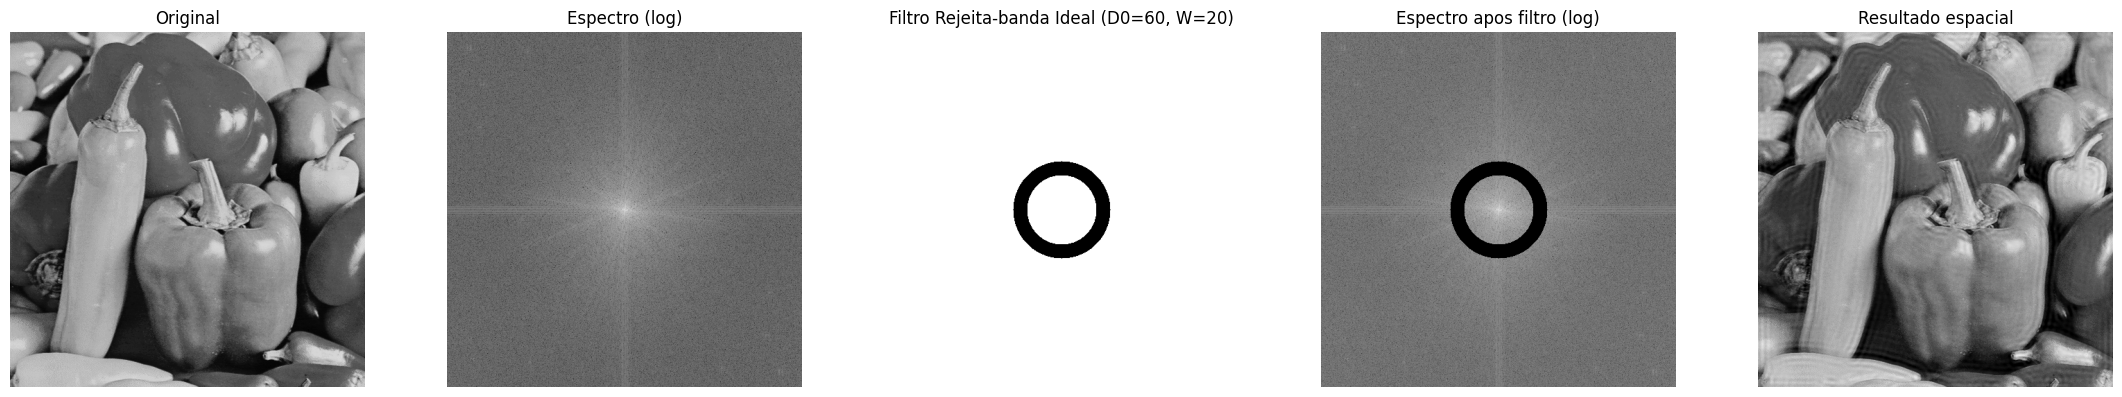

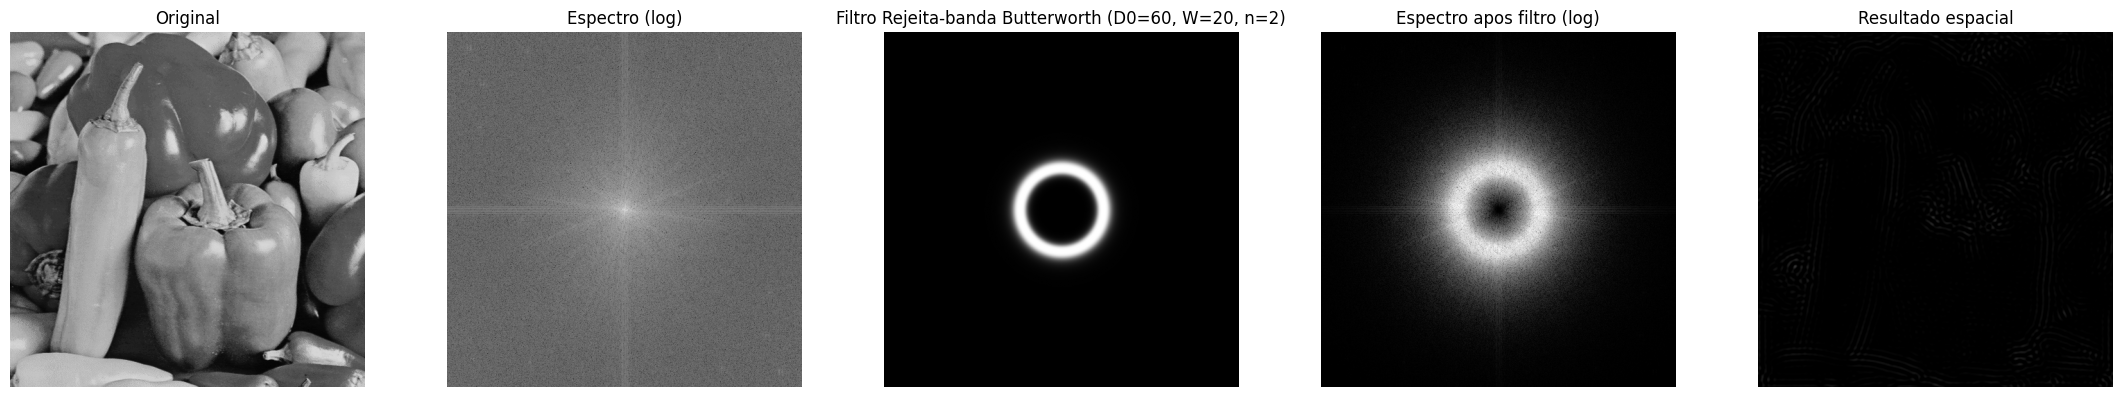

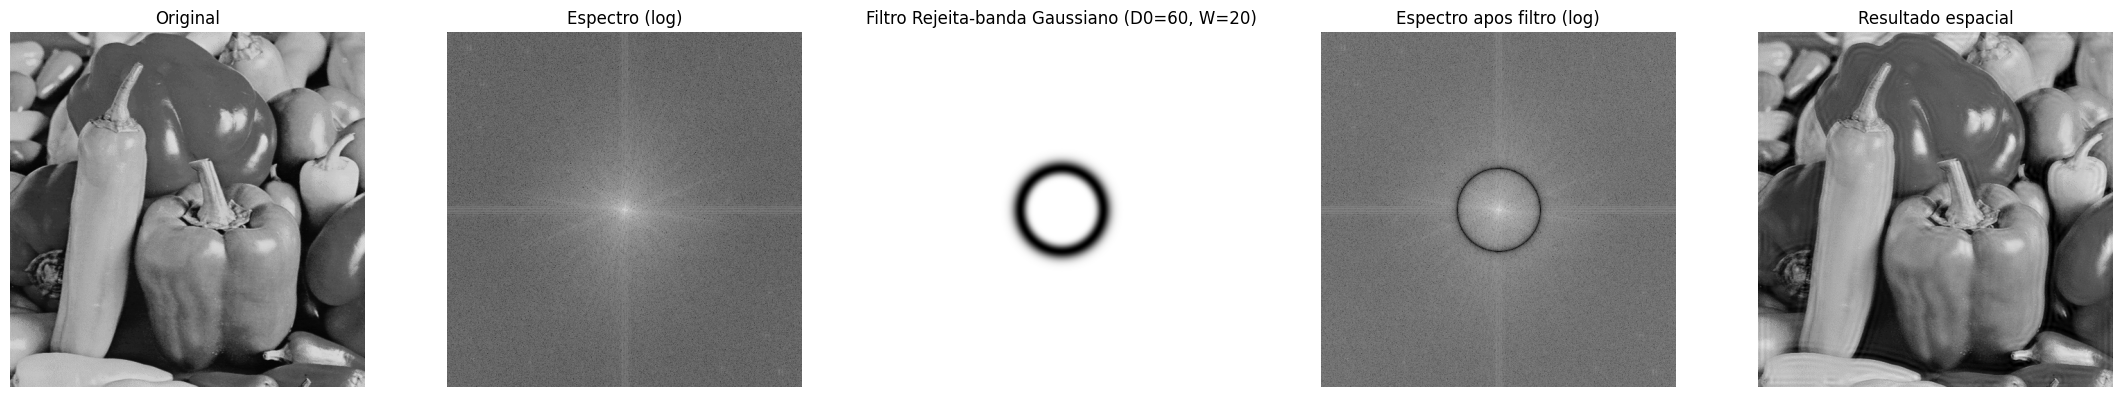

In [ ]:
peppers_q20 = IMG_GRAY + "peppers_gray.tif"

gray = True

img_peppers_q20 = carregar_imagem(peppers_q20, gray)

D0 = 60
W  = 20
n  = 2

# Passa-banda
H_pb_ideal = filtro_passa_banda_ideal(img_peppers_q20.shape, D0, W)
H_pb_butt  = filtro_passa_banda_butterworth(img_peppers_q20.shape, D0, W, n=n)
H_pb_gauss = filtro_passa_banda_gaussiano(img_peppers_q20.shape, D0, W)

img_pb_ideal = mostra_resultados_q18(img_peppers_q20, H_pb_ideal, f"Passa-banda Ideal (D0={D0}, W={W})")
img_pb_butt  = mostra_resultados_q18(img_peppers_q20, H_pb_butt,  f"Passa-banda Butterworth (D0={D0}, W={W}, n={n})")
img_pb_gauss = mostra_resultados_q18(img_peppers_q20, H_pb_gauss, f"Passa-banda Gaussiano (D0={D0}, W={W})")

# Rejeita-banda
H_rb_ideal = 1.0 - H_pb_ideal
H_rb_butt  = 1.0 - H_pb_butt
H_rb_gauss = 1.0 - H_pb_gauss

img_rb_ideal = mostra_resultados_q18(img_peppers_q20, H_rb_ideal, f"Rejeita-banda Ideal (D0={D0}, W={W})")
img_rb_butt  = mostra_resultados_q18(img_peppers_q20, H_rb_butt,  f"Rejeita-banda Butterworth (D0={D0}, W={W}, n={n})")
img_rb_gauss = mostra_resultados_q18(img_peppers_q20, H_rb_gauss, f"Rejeita-banda Gaussiano (D0={D0}, W={W})")

# Questão 21

Aplique a Transformada Discreta de Fourier (DFT) e a Transformada Rápida
de Fourier (FFT), comparando tempo de execução e resultados visuais do espectro.

In [ ]:
def calcula_dft(img):

  img_float = np.float32(img)

  dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

  dft_shift = np.fft.fftshift(dft)

  magnitude = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])

  espectro = np.log(1 + magnitude)

  return espectro

In [ ]:
def calcula_fft(img):

  fft = np.fft.fft2(img)

  fft_shift = np.fft.fftshift(fft)

  magnitude = np.abs(fft_shift)

  espectro = np.log(1 + magnitude)

  return espectro

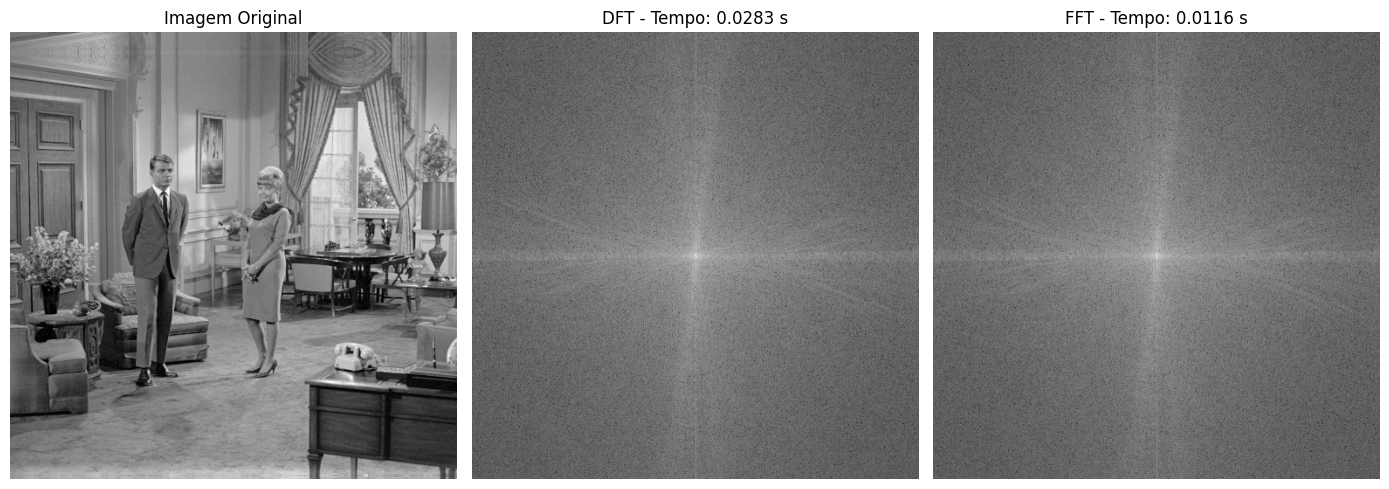

In [ ]:
livingroom_q21 = IMG_GRAY + "livingroom.tif"

gray = True

img_livingroom_q21 = carregar_imagem(livingroom_q21, gray)

inicio_dft = time.time()
espectro_dft = calcula_dft(img_livingroom_q21)
tempo_dft = time.time() - inicio_dft

#FFT
inicio_fft = time.time()
espectro_fft = calcula_fft(img_livingroom_q21)
tempo_fft = time.time() - inicio_fft

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_livingroom_q21, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(espectro_dft, cmap='gray')
plt.title(f"DFT - Tempo: {tempo_dft:.4f} s")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(espectro_fft, cmap='gray')
plt.title(f"FFT - Tempo: {tempo_fft:.4f} s")
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 22

Aplique a Transformada Haar, apresentando as três primeiras decomposições
e discutindo suas aplicações em análise e compressão de imagens.

In [ ]:
def haar_1d(v):

  n = v.shape[0]

  assert n % 2 == 0

  aprox = (v[0::2] + v[1::2]) / 2.0
  detalhe = (v[0::2] - v[1::2]) / 2.0

  return aprox, detalhe

In [ ]:
def haar_2d_um_nivel(img_float):

  h, w = img_float.shape

  assert h % 2 == 0 and w % 2 == 0

  #Linhas
  aprox_linhas = np.zeros((h, w // 2), dtype=np.float32)
  det_linhas   = np.zeros((h, w // 2), dtype=np.float32)

  for i in range(h):

    a, d = haar_1d(img_float[i, :])
    aprox_linhas[i, :] = a
    det_linhas[i, :] = d

  #Colunas
  LL = np.zeros((h // 2, w // 2), dtype=np.float32)
  HL = np.zeros((h // 2, w // 2), dtype=np.float32)

  for j in range(w // 2):

    a, d = haar_1d(aprox_linhas[:, j])
    LL[:, j] = a
    HL[:, j] = d

  LH = np.zeros((h // 2, w // 2), dtype=np.float32)
  HH = np.zeros((h // 2, w // 2), dtype=np.float32)

  for j in range(w // 2):

    a, d = haar_1d(det_linhas[:, j])
    LH[:, j] = a
    HH[:, j] = d

  return LL, LH, HL, HH

In [ ]:
def normaliza_para_visualizacao(x):

  x = x.astype(np.float32)

  mn, mx = np.min(x), np.max(x)

  if mx - mn < 1e-8:

    return np.zeros_like(x, dtype=np.uint8)

  y = (x - mn) / (mx - mn)

  y = np.clip(y * 255.0, 0, 255).astype(np.uint8)

  return y

In [ ]:
def visu_haar(LL, LH, HL, HH):

  LLv = normaliza_para_visualizacao(LL)
  LHv = normaliza_para_visualizacao(LH)
  HLv = normaliza_para_visualizacao(HL)
  HHv = normaliza_para_visualizacao(HH)

  top = np.hstack([LLv, LHv])
  bot = np.hstack([HLv, HHv])

  return np.vstack([top, bot])

In [ ]:
def decomposicoes_haar(img, niveis=3):

  atual = img.astype(np.float32)
  mosaicos = []

  for _ in range(niveis):

    LL, LH, HL, HH = haar_2d_um_nivel(atual)

    mosaicos.append(visu_haar(LL, LH, HL, HH))

    atual = LL

  return mosaicos, (LL, LH, HL, HH)

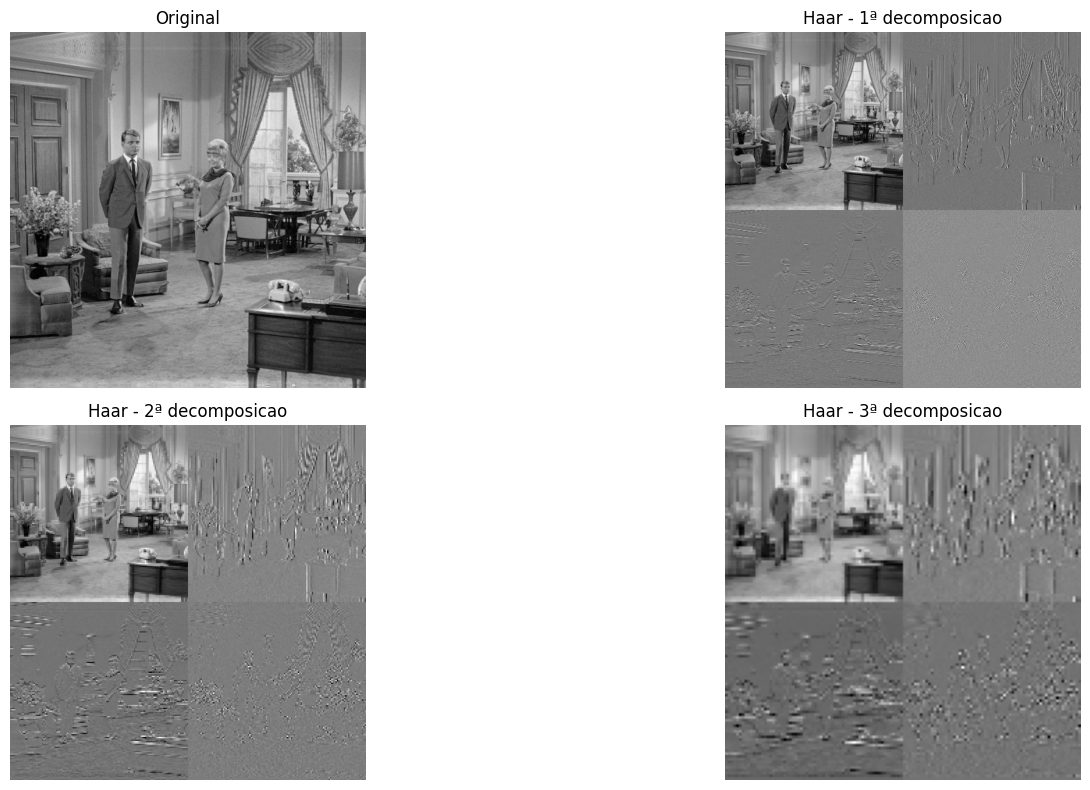

In [ ]:
livingroom_q22 = IMG_GRAY + "livingroom.tif"

gray = True

img_livingroom_q22 = carregar_imagem(livingroom_q22, gray)

mosaicos, _ = decomposicoes_haar(img_livingroom_q22, niveis=3)

plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_livingroom_q22, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mosaicos[0], cmap='gray', vmin=0, vmax=255)
plt.title("Haar - 1ª decomposicao")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mosaicos[1], cmap='gray', vmin=0, vmax=255)
plt.title("Haar - 2ª decomposicao")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(mosaicos[2], cmap='gray', vmin=0, vmax=255)
plt.title("Haar - 3ª decomposicao")
plt.axis('off')

plt.tight_layout()
plt.show()

# Questão 23

Realize a detecção de pele em imagens capturadas por webcam, utilizando os
modelos de cor HSV e YCrCb, e compare os resultados.

**Não da pra rodar no colab**

# Questão 24

Desenvolva o rastreamento de um objeto colorido de escolha do aluno,
utilizando RGB ou HSV, identificando e exibindo o centróide do objeto em tempo real.

**Não da pra rodar no colab**